Import libaries

In [1]:
import pandas as pd
import spacy
import tensorflow as tf
import seaborn as sns

In [2]:
disaster = pd.read_csv("train.csv")
disaster.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
disaster.shape

(7613, 5)

In [4]:
disaster.describe(include="all")

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


0    57.03
1    42.97
Name: target, dtype: float64


<AxesSubplot: xlabel='target', ylabel='count'>

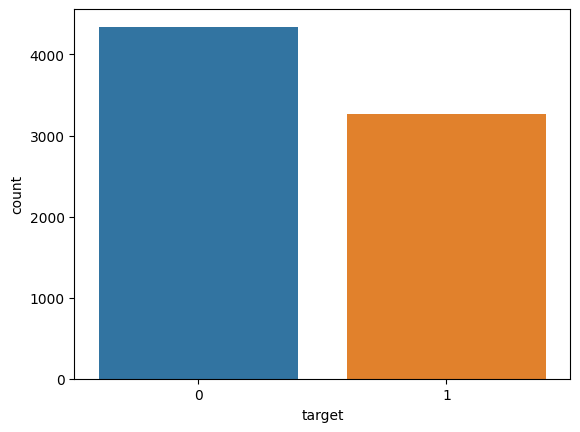

In [5]:
print((100*disaster.target.value_counts()/len(disaster)).round(2))
sns.countplot(x = disaster["target"])

In [6]:
!python -m spacy download en_core_web_sm -q

2022-10-12 19:15:35.550652: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-10-12 19:15:35.551381: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-12 19:15:44.035921: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-10-12 19:15:44.036458: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-12 19:15:44.046024: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-5R7882FN
2022-10-12 19:15:44.046744: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: LAPTOP-5R7882FN


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
import en_core_web_sm
nlp = en_core_web_sm.load()

# Import Stop words 
from spacy.lang.en.stop_words import STOP_WORDS

we create a complete corpus of text in a variable. This is a best-practice in the use of spacy

In [8]:
# Stripped corpus of text
stripped_corpus = [text.strip() for text in disaster["text"]]
# Join corpus to make one full string
full_corpus = " ".join(stripped_corpus)

Now load your clean corpus in a doc object.

In [9]:
doc = nlp(full_corpus)

create a first word cloud

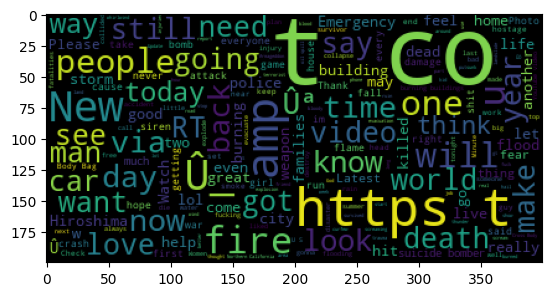

In [10]:
# Import matplotlib and wordcloud 
import matplotlib.pyplot as plt
import wordcloud


# Instanciate WordCloud 
wd = wordcloud.WordCloud()
cloud = wd.generate(doc.text)

# Show word cloud with matplotlib 
plt.imshow(cloud)

# Remove trailing logs 
plt.show()

Preprocessing text

In [11]:
# Remove all non alphanumeric characters except whitespaces
disaster["text_clean"] = disaster["text"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" "))
# remove double spaces and spaces at the beginning and end of strings
disaster["text_clean"] = disaster["text_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())
# remove stop words and replace everyword with their lemma
disaster["text_clean"] = disaster["text_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)]))

In [12]:
disaster

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got send photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,giant crane hold bridge collapse nearby home h...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary thetawniest control wild fire calif...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m194 0104 utc5 km s volcano hawaii httptcozdto...
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigate ebike collide car little po...


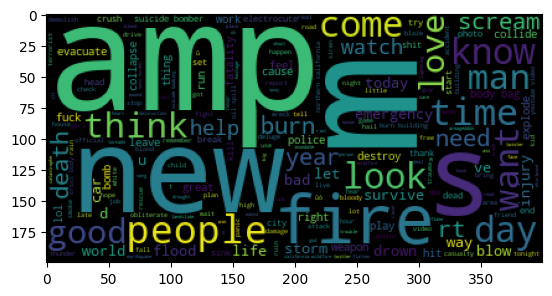

In [13]:
# Stripped corpus of text
stripped_corpus_clean = [text.strip() for text in disaster["text_clean"]]
# Join corpus to make one full string
full_corpus_clean = " ".join(stripped_corpus_clean)
# load your clean corpus in a doc object

# Generate wordcloud
cloud = wd.generate(full_corpus_clean)

# Show word cloud with matplotlib 
plt.imshow(cloud)

# Remove trailing logs 
plt.show()

Let's push analysis further! Some words are really common in our corpus, find which of them

In [16]:
lemmadf = pd.Series(stripped_corpus_clean)
lemmadf

0                    deed reason earthquake allah forgive
1                   forest fire near la ronge sask canada
2       resident ask shelter place notify officer evac...
3       13000 people receive wildfire evacuation order...
4       got send photo ruby alaska smoke wildfire pour...
                              ...                        
7608    giant crane hold bridge collapse nearby home h...
7609    ariaahrary thetawniest control wild fire calif...
7610    m194 0104 utc5 km s volcano hawaii httptcozdto...
7611    police investigate ebike collide car little po...
7612    late home raze northern california wildfire   ...
Length: 7613, dtype: object

In [17]:
mask_common = lemmadf.value_counts()>15
common = lemmadf[mask_common]
common

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

Using tf.keras.preprocessing.text.Tokenizer Tokenizer, process to encoding all the reviews 

In [131]:
import numpy as np
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = 1000, oov_token= "<OOV>") # instanciate the tokenizer
tokenizer.fit_on_texts(disaster.text_clean)
disaster["text_encoded"] = tokenizer.texts_to_sequences(disaster.text_clean)

In [132]:
tokenizer.index_word

{1: '<OOV>',
 2: 'like',
 3: 'm',
 4: 'fire',
 5: 'amp',
 6: 's',
 7: 'new',
 8: 'people',
 9: 'news',
 10: 'burn',
 11: 'video',
 12: 'kill',
 13: '2',
 14: 'crash',
 15: 'come',
 16: 'bomb',
 17: 'emergency',
 18: 'disaster',
 19: 'attack',
 20: 'time',
 21: 'body',
 22: 'year',
 23: 'look',
 24: 'police',
 25: 'man',
 26: 'home',
 27: 'day',
 28: 'know',
 29: 'family',
 30: 'flood',
 31: 'building',
 32: 'good',
 33: 'love',
 34: 'think',
 35: 'storm',
 36: 'california',
 37: 'train',
 38: 'watch',
 39: 'suicide',
 40: 'want',
 41: 'collapse',
 42: 'world',
 43: 'life',
 44: 'bag',
 45: 'car',
 46: 'scream',
 47: 'death',
 48: '3',
 49: 'rt',
 50: 'cause',
 51: 'work',
 52: 'need',
 53: 'nuclear',
 54: 'wreck',
 55: 'drown',
 56: 'war',
 57: 'youtube',
 58: 'today',
 59: 'let',
 60: 'accident',
 61: 'destroy',
 62: 'dead',
 63: 'plan',
 64: 'fear',
 65: 'help',
 66: 'weapon',
 67: 'hiroshima',
 68: 'way',
 69: 'wildfire',
 70: 'feel',
 71: 'wound',
 72: 'find',
 73: 'live',
 74: 'u'

In [80]:
disaster.head()

,id,keyword,location,text,target,text_clean,text_encoded
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive,"[1, 413, 173, 1, 1]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[119, 4, 162, 512, 1, 1, 1]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...,"[1, 445, 1, 324, 1, 293, 188, 1, 324, 281, 380]"
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...,"[1, 8, 1, 69, 188, 281, 36]"
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got send photo ruby alaska smoke wildfire pour...,"[259, 181, 123, 1, 1, 174, 69, 1, 112]"


In [81]:
disaster_pad = tf.keras.preprocessing.sequence.pad_sequences(disaster.text_encoded, padding="post")

In [82]:
disaster_pad.shape[1]

25

In [83]:
maxlen = disaster_pad.shape[1]

In [84]:
from sklearn.model_selection import train_test_split
# Train Test Split
xtrain, xval, ytrain, yval = train_test_split(disaster_pad,disaster.target, test_size=0.2, stratify=disaster.target)

In [85]:
train = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
val = tf.data.Dataset.from_tensor_slices((xval, yval))

In [86]:
train_batch = train.shuffle(len(train)).batch(64)
val_batch = val.shuffle(len(val)).batch(64)

In [87]:
 # Regardons un batch 
for tweet, target in train_batch.take(1):
    print(tweet, target)

tf.Tensor(
[[637   1   0 ...   0   0   0]
 [  1   1   1 ...   0   0   0]
 [  1   1   1 ...   0   0   0]
 ...
 [  1 416   1 ...   0   0   0]
 [  1 166   1 ...   0   0   0]
 [  1  90   1 ...   0   0   0]], shape=(64, 25), dtype=int32) tf.Tensor(
[0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0
 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0], shape=(64,), dtype=int64)


 ## create a model in order to train an embedding!

In [88]:
vocab_size = tokenizer.num_words
model = tf.keras.Sequential([
                  # Couche d'Input Word Embedding           
                  tf.keras.layers.Embedding(vocab_size+1, 64, input_shape=[tweet.shape[1],],name="embedding"),
                  # Gobal average pooling
                  tf.keras.layers.GlobalAveragePooling1D(),

                  # Couche Dense classique
                  tf.keras.layers.Dense(32, activation='relu'),
                  tf.keras.layers.Dense(16, activation='relu'),

                  # Couche de sortie avec le nombre de neurones en sortie égale au nombre de classe avec fonction softmax
                  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [89]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 64)            64064     
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
__________________________________________________

In [90]:
optimizer= tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["Accuracy"])

In [91]:
history = model.fit(train_batch, 
                    epochs=10, 
                    validation_data=val_batch)

Epoch 1/10
96/96 [==============================] - 1s 5ms/step - loss: 0.6769 - Accuracy: 0.5691 - val_loss: 0.6596 - val_Accuracy: 0.5706
Epoch 2/10
96/96 [==============================] - 0s 3ms/step - loss: 0.5995 - Accuracy: 0.6819 - val_loss: 0.5385 - val_Accuracy: 0.7557
Epoch 3/10
96/96 [==============================] - 0s 3ms/step - loss: 0.4453 - Accuracy: 0.8118 - val_loss: 0.4988 - val_Accuracy: 0.7577
Epoch 4/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3931 - Accuracy: 0.8323 - val_loss: 0.4978 - val_Accuracy: 0.7695
Epoch 5/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3739 - Accuracy: 0.8365 - val_loss: 0.5079 - val_Accuracy: 0.7676
Epoch 6/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3636 - Accuracy: 0.8406 - val_loss: 0.5191 - val_Accuracy: 0.7656
Epoch 7/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3580 - Accuracy: 0.8402 - val_loss: 0.5190 - val_Accuracy: 0.7708
Epoch 8/10
96/96 [==

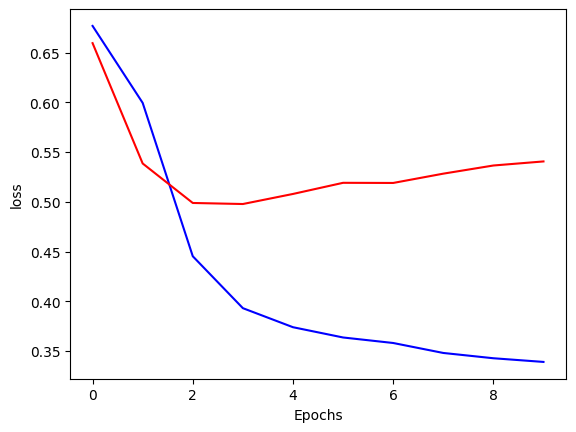

In [92]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function 
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

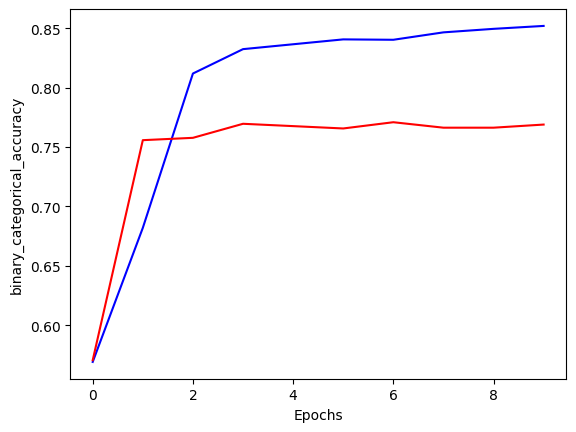

In [93]:
# Visualization of accuracy training 
plt.plot(history.history["Accuracy"], color="b")
plt.plot(history.history["val_Accuracy"], color="r")
plt.ylabel("binary_categorical_accuracy")
plt.xlabel("Epochs")
plt.show()

## SimpleRNN

In [94]:
vocab_size = tokenizer.num_words
model = tf.keras.Sequential([
                  # Word Embedding layer           
                  tf.keras.layers.Embedding(vocab_size+1, 64, input_shape=[tweet.shape[1],],name="embedding"),
                  # Gobal average pooling
                  tf.keras.layers.SimpleRNN(units=64, return_sequences=True), # maintains the sequential nature
                  tf.keras.layers.SimpleRNN(units=32, return_sequences=False), # returns the last output
                  # Dense layers once the data is flat
                  # tf.keras.layers.Dense(16, activation='relu'),
                  # tf.keras.layers.Dense(8, activation='relu'),

                  # output layer with as many neurons as the number of classes
                  # for the target variable and softmax activation
                  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [95]:
optimizer= tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [96]:
history = model.fit(train_batch, 
                    epochs=10, 
                    validation_data=val_batch)

Epoch 1/10
96/96 [==============================] - 4s 15ms/step - loss: 0.5637 - binary_accuracy: 0.7076 - val_loss: 0.5354 - val_binary_accuracy: 0.7472
Epoch 2/10
96/96 [==============================] - 1s 12ms/step - loss: 0.4096 - binary_accuracy: 0.8287 - val_loss: 0.5461 - val_binary_accuracy: 0.7505
Epoch 3/10
96/96 [==============================] - 1s 12ms/step - loss: 0.3268 - binary_accuracy: 0.8698 - val_loss: 0.5869 - val_binary_accuracy: 0.7288
Epoch 4/10
96/96 [==============================] - 1s 12ms/step - loss: 0.2556 - binary_accuracy: 0.9018 - val_loss: 0.6534 - val_binary_accuracy: 0.7203
Epoch 5/10
96/96 [==============================] - 1s 12ms/step - loss: 0.2057 - binary_accuracy: 0.9246 - val_loss: 0.7181 - val_binary_accuracy: 0.7347
Epoch 6/10
96/96 [==============================] - 1s 12ms/step - loss: 0.1792 - binary_accuracy: 0.9343 - val_loss: 0.7781 - val_binary_accuracy: 0.7249
Epoch 7/10
96/96 [==============================] - 1s 10ms/step - los

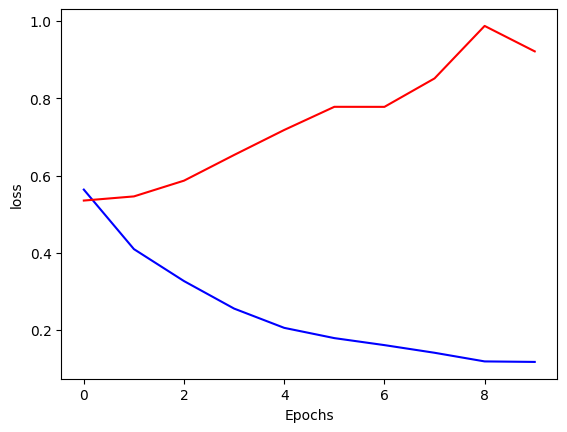

In [97]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function 
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

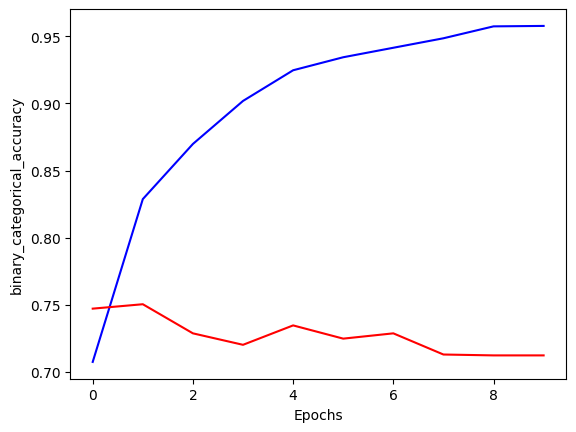

In [98]:
# Visualization of accuracy training 
plt.plot(history.history["binary_accuracy"], color="b")
plt.plot(history.history["val_binary_accuracy"], color="r")
plt.ylabel("binary_categorical_accuracy")
plt.xlabel("Epochs")
plt.show()

In [99]:
model.save("model_simpleRNN.h5")

## GRU

In [100]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM

vocab_size = len(tokenizer.word_index)
model_gru = tf.keras.Sequential([
                  Embedding(vocab_size+1, 64, input_shape=[tweet.shape[1],],name="embedding"),
                  GRU(units=64, return_sequences=True), # maintains the sequential nature
                  GRU(units=32, return_sequences=False), # returns the last output
                  Dense(16, activation='relu'),
                  Dense(8, activation='relu'),

                  Dense(1, activation="sigmoid")
])

In [101]:
model_gru.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 64)            1304384   
                                                                 
 gru_2 (GRU)                 (None, 25, 64)            24960     
                                                                 
 gru_3 (GRU)                 (None, 32)                9408      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,339,425
Trainable params: 1,339,425
No

In [102]:
optimizer= tf.keras.optimizers.Adam()

model_gru.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [103]:
history_gru = model_gru.fit(train_batch, 
                            epochs=10, 
                            validation_data=val_batch)

Epoch 1/10
96/96 [==============================] - 11s 61ms/step - loss: 0.6846 - binary_accuracy: 0.5703 - val_loss: 0.6836 - val_binary_accuracy: 0.5706
Epoch 2/10
96/96 [==============================] - 5s 53ms/step - loss: 0.6452 - binary_accuracy: 0.6200 - val_loss: 0.5550 - val_binary_accuracy: 0.7439
Epoch 3/10
96/96 [==============================] - 6s 57ms/step - loss: 0.4504 - binary_accuracy: 0.8067 - val_loss: 0.5057 - val_binary_accuracy: 0.7663
Epoch 4/10
96/96 [==============================] - 6s 57ms/step - loss: 0.3986 - binary_accuracy: 0.8353 - val_loss: 0.5136 - val_binary_accuracy: 0.7735
Epoch 5/10
96/96 [==============================] - 5s 56ms/step - loss: 0.3776 - binary_accuracy: 0.8425 - val_loss: 0.5074 - val_binary_accuracy: 0.7708
Epoch 6/10
96/96 [==============================] - 6s 61ms/step - loss: 0.3740 - binary_accuracy: 0.8478 - val_loss: 0.5405 - val_binary_accuracy: 0.7347
Epoch 7/10
96/96 [==============================] - 6s 60ms/step - lo

In [119]:
model_gru.evaluate(xval, yval)

48/48 [==============================] - 3s 11ms/step - loss: 0.5416 - binary_accuracy: 0.7571


[0.5415894389152527, 0.7570584416389465]

In [120]:
import numpy as np
y_predicted = model.predict(xval)
y_predicted = y_predicted.flatten()
y_predicted = np.where(y_predicted > 0.5, 1, 0)
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(yval, y_predicted)
matrix

48/48 [==============================] - 1s 7ms/step


array([[680, 189],
       [249, 405]], dtype=int64)

In [ ]:
import numpy as np
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
y_predicted = np.where(y_predicted > 0.5, 1, 0)
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_predicted)
matrix

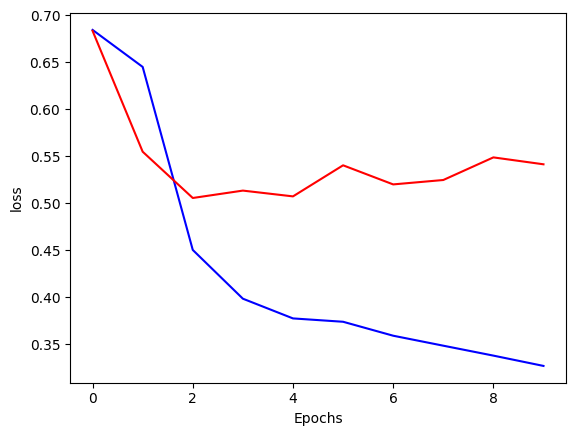

In [104]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function 
plt.plot(history_gru.history["loss"], color="b")
plt.plot(history_gru.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

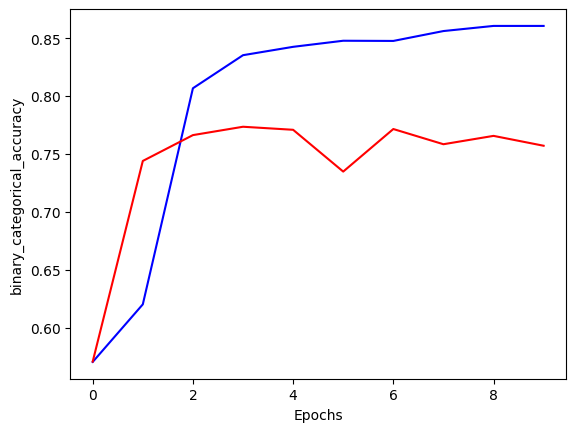

In [105]:
# Visualization of accuracy training 
plt.plot(history_gru.history["binary_accuracy"], color="b")
plt.plot(history_gru.history["val_binary_accuracy"], color="r")
plt.ylabel("binary_categorical_accuracy")
plt.xlabel("Epochs")
plt.show()

In [106]:
model_gru.save("model_gru.h5")

In [42]:
from tensorflow.keras.layers import LSTM

vocab_size = len(tokenizer.word_index)
model_lstm = tf.keras.Sequential([
                  Embedding(vocab_size+1, 64, input_shape=[tweet.shape[1],],name="embedding"),
                  # LSTM(units=64, return_sequences=True), # maintains the sequential nature
                  LSTM(units=32, return_sequences=False), # returns the last output
                  Dense(16, activation='relu'),
                  Dense(8, activation='relu'),

                  Dense(1, activation="sigmoid", name="last")
])

In [43]:
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 64)            1304384   
                                                                 
 lstm (LSTM)                 (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 last (Dense)                (None, 1)                 9         
                                                                 
Total params: 1,317,473
Trainable params: 1,317,473
Non-trainable params: 0
_________________________________________________________________


In [44]:
optimizer= tf.keras.optimizers.Adam()

model_lstm.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [45]:
history_lstm = model_lstm.fit(train_batch, 
                              epochs=10,
                              validation_data=val_batch)

Epoch 1/10
96/96 [==============================] - 8s 45ms/step - loss: 0.6569 - binary_accuracy: 0.6020 - val_loss: 0.5599 - val_binary_accuracy: 0.7433
Epoch 2/10
96/96 [==============================] - 3s 35ms/step - loss: 0.4880 - binary_accuracy: 0.7824 - val_loss: 0.5052 - val_binary_accuracy: 0.7800
Epoch 3/10
96/96 [==============================] - 3s 35ms/step - loss: 0.4477 - binary_accuracy: 0.8034 - val_loss: 0.4935 - val_binary_accuracy: 0.7800
Epoch 4/10
96/96 [==============================] - 3s 35ms/step - loss: 0.4375 - binary_accuracy: 0.8080 - val_loss: 0.4922 - val_binary_accuracy: 0.7774
Epoch 5/10
96/96 [==============================] - 3s 36ms/step - loss: 0.4255 - binary_accuracy: 0.8166 - val_loss: 0.5107 - val_binary_accuracy: 0.7892
Epoch 6/10
96/96 [==============================] - 3s 35ms/step - loss: 0.4225 - binary_accuracy: 0.8184 - val_loss: 0.4991 - val_binary_accuracy: 0.7787
Epoch 7/10
96/96 [==============================] - 4s 37ms/step - los

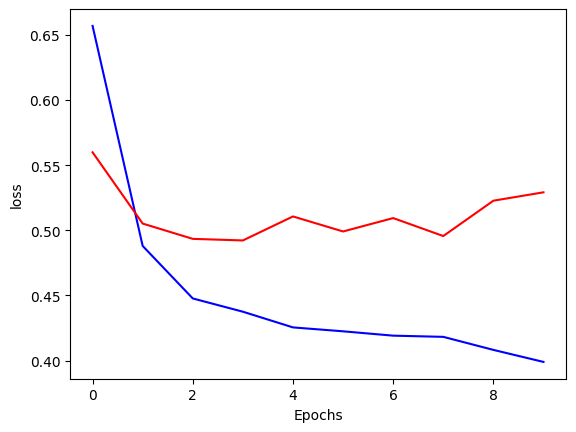

In [46]:
# Visualization of the training process on the loss function 
plt.plot(history_lstm.history["loss"], color="b")
plt.plot(history_lstm.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

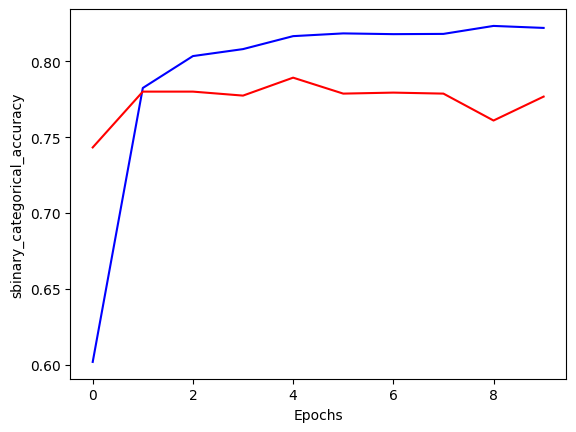

In [47]:
# Visualization of accuracy training 
plt.plot(history_lstm.history["binary_accuracy"], color="b")
plt.plot(history_lstm.history["val_binary_accuracy"], color="r")
plt.ylabel("sbinary_categorical_accuracy")
plt.xlabel("Epochs")
plt.show()

In [48]:
model_lstm.save("model_lstm.h5")

## predict the target test

In [107]:
df_test = pd.read_csv("test.csv")

In [108]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [109]:
len(df_test)

3263

In [110]:
# Remove all non alphanumeric characters except whitespaces
df_test["text_clean"] = df_test["text"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" "))
# remove double spaces and spaces at the beginning and end of strings
df_test["text_clean"] = df_test["text_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())
# remove stop words and replace everyword with their lemma
df_test["text_clean"] = df_test["text_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)]))

In [111]:
tokenizer.fit_on_texts(df_test.text_clean)
df_test["text_encoded"] = tokenizer.texts_to_sequences(df_test.text_clean)

df_test_pad = tf.keras.preprocessing.sequence.pad_sequences(df_test.text_encoded, padding="post",maxlen=maxlen)

In [112]:
#Let's make predictions on the first batch of the test set
# test_input, test_target = next(iter(test_batch))

pred = model_gru.predict(df_test_pad)
pred
# we get one porbability for each class

102/102 [==============================] - 2s 9ms/step


array([[0.08563058],
       [0.63570553],
       [0.07688376],
       ...,
       [0.5406516 ],
       [0.08044145],
       [0.3086734 ]], dtype=float32)

In [113]:
# let's convert these predictions into classes
len(pred)

3263

In [114]:
df_predict = pd.DataFrame(pred, columns=['proba'])
df_predict.head()

,proba
0,0.085631
1,0.635706
2,0.076884
3,0.163605
4,0.107423


In [115]:
df_predict["target"] = df_predict["proba"].apply(lambda x : 0 if x <0.95
                                    else 1)
df_predict

,proba,target
0,0.085631,0
1,0.635706,0
2,0.076884,0
3,0.163605,0
4,0.107423,0
...,...,...
3258,0.978325,1
3259,0.681892,0
3260,0.540652,0
3261,0.080441,0


In [117]:
df_predict['target'].value_counts()

0    2695
1     568
Name: target, dtype: int64

In [118]:
output = pd.DataFrame({'id': df_test["id"],
                       'target': df_predict["target"]  })
output.to_csv('submission_python_gru6.csv', index=False)